# Haberman Cancer Survival

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
#Load Dataset
data = pd.read_csv('haberman.csv')
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Rename Columns as

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
* 1 = the patient survived 5 years or longer
* 2 = the patient died within 5 year

In [49]:
data.rename(columns={'30':'Age', '64':'yr_of_opr', '1':'No_of_axillary', '1.1':'Survival_status'}, inplace=True)
data.head()

,Age,yr_of_opr,No_of_axillary,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### Number of data points and features

In [50]:
data.shape

(305, 4)

### Age

In [55]:
data.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

From above we can conclude that:
* Oldest patient is 83 years old
* Youngest patient is 30 years old
* Average patient age is 52 years old

### Patient's year of operation

In [61]:
data.yr_of_opr.describe()

count    305.000000
mean      62.849180
std        3.254078
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: yr_of_opr, dtype: float64

Above data did not give us much information. Lets check histogram

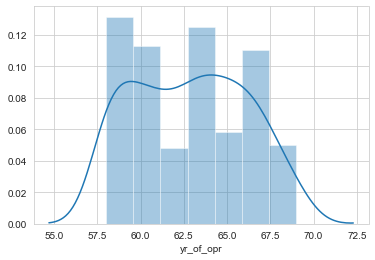

In [65]:
sns.set_style('whitegrid')
sns.distplot(data['yr_of_opr'])

Data is recordeed between 1958 and 1969

Most of the data is between 1958 and 1960

In [67]:
data.No_of_axillary.describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: No_of_axillary, dtype: float64

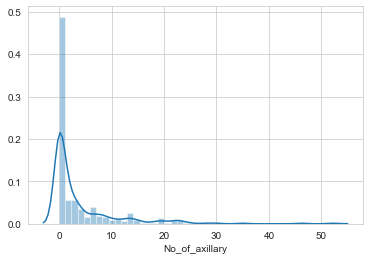

In [68]:
sns.distplot(data['No_of_axillary'])

From above we can conclude the following

1. Highest number of Axillary nodes in a person is 52
2. Lowest number of Axillary nodes in a person is 0.
3. Mean number of Axillary nodes is 4
4. Median of Number of Axillary nodes is 1
5. Most persons have Number of Axillary nodes in 0-5 range

### Survival Status

In [71]:
data.Survival_status.describe()

count    305.000000
mean       1.265574
std        0.442364
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Survival_status, dtype: float64

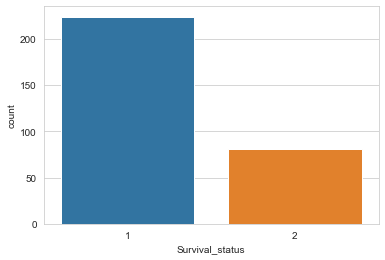

In [73]:
sns.countplot(data['Survival_status'])

 Its an imbalanced dataset as one class has more values than other class.Most patients survived for longer than 5 years.

### Age vs. Survival rate

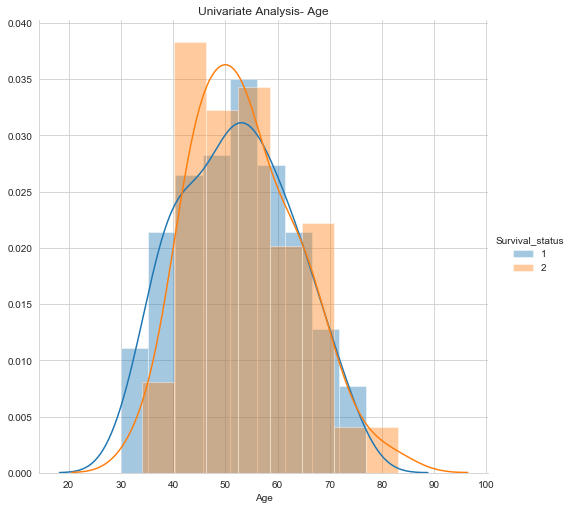

In [78]:
sns.FacetGrid(data, hue='Survival_status', height=7).map(sns.distplot, 'Age').add_legend()
_ = plt.title("Univariate Analysis- Age")

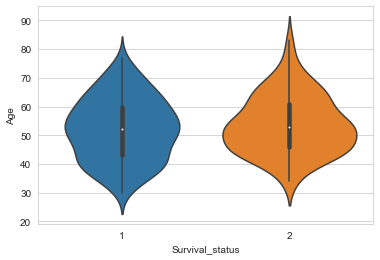

In [79]:
_=sns.violinplot(x='Survival_status', y='Age', data=data)

From above plots, we can see that both have similar distribution. But, Patients who survived is a bit flatter compared to patients who did not survive

### Year vs Survival Rate

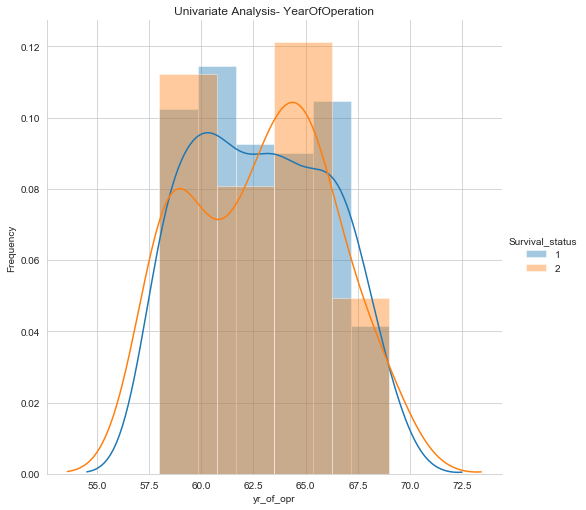

In [82]:
sns.FacetGrid(data, hue='Survival_status', height=7).map(sns.distplot, 'yr_of_opr').add_legend()
plt.ylabel('Frequency')
_ = plt.title("Univariate Analysis- YearOfOperation")

Now, lets plot a pair plot to see how each column varies over other column

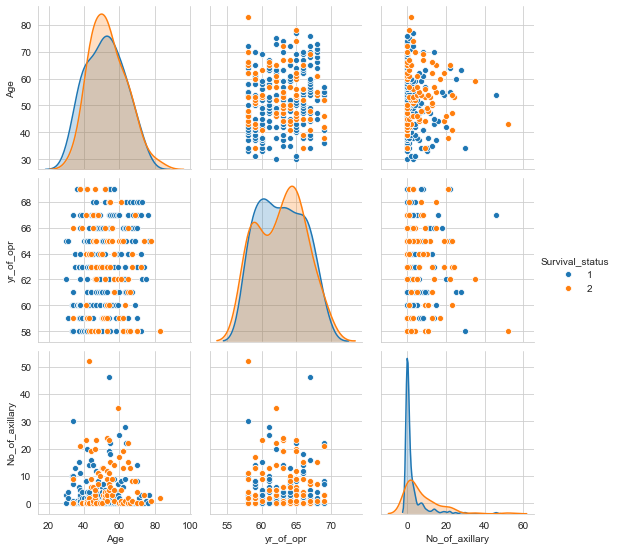

In [85]:
sns.pairplot(data, hue='Survival_status')

Above pair-plot shows that both classes are mixed and there's no clear pattern that separates both of them

### Correlation
Lets plot correlations between columns

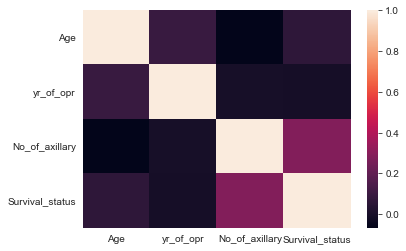

In [88]:
corr=data.corr()
sns.heatmap(corr, yticklabels=corr.columns,
           xticklabels=corr.columns)

From the above correlation heat-map, we can conclude the following

1. #AxillaryNodes has no correlation with Age and Year Of Operation.
2. #AxillaryNodes and SurvivalStatus are slightly correlated.
3. Age and SurvivalStatus are also slightly correlated. But, correlation is less compared to correlation between #AxillaryNodes and SurvivalStatus